In [ ]:
# ML 
# Supervised 
# Regression 
# Linear 
# Linear Regression 

In [ ]:
# Linear Regression Assumptions - 
# 1. The dependent variable has a linear relationship with indepedent variables. 
# 2. 

In [ ]:
# What is a line

# y = mx + c
# you require only 2 components to make a line 

# m -> slope of the line 
# c -> constant 

In [ ]:
# y = mx + c
# y = m1x1 + m2x2 + m3x3 + c 
# This time you have to find m1, m2, m3, c 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
# To install 
# !pip install scikit-learn
import sklearn

In [4]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()

In [7]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
data["filename"]

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [9]:
print(data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df = pd.DataFrame(data=data["data"], columns=data["feature_names"])
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [13]:
df["PRICE"] = data["target"]
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [18]:
X = df.loc[:, : "LSTAT"]
Y = df.loc[:, ["PRICE"]]

In [19]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [20]:
Y.head()

PRICE
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2

In [21]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
# y = m1x1 + m2x2 ..... + c 
# PRICE = m1*(CRIM) + m2*(ZN) + m3*(INDUS) + m4*(CHAS) ...... + m13*(LSTAT)

In [22]:
lr.intercept_  # c

array([36.45948839])

In [23]:
lr.coef_ # m1, m2, m3, m4

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [ ]:
# OK ... Wait .... 

In [29]:
[f"{round(lr.coef_[0][i], 3)}*{X.columns[i]} +" for i in range(13)]

['-0.108*CRIM +',
 '0.046*ZN +',
 '0.021*INDUS +',
 '2.687*CHAS +',
 '-17.767*NOX +',
 '3.81*RM +',
 '0.001*AGE +',
 '-1.476*DIS +',
 '0.306*RAD +',
 '-0.012*TAX +',
 '-0.953*PTRATIO +',
 '0.009*B +',
 '-0.525*LSTAT +']

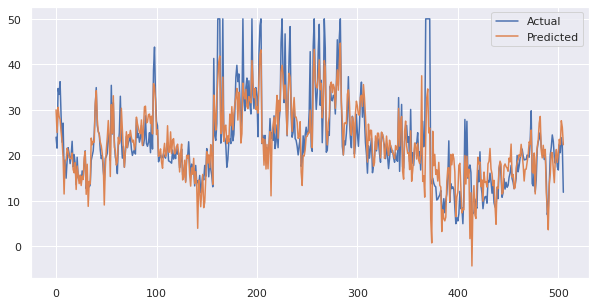

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df.PRICE, label="Actual")
plt.plot(lr.predict(X), label="Predicted")
plt.legend()